In [3]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations by chaining numpy and random, using the uniform method
# to get float values between the pre-defined range. In addition, we'll pack the latitudes (lats) and longitudes (lngs) 
# as pairs by zipping them (lat_lngs) with the zip() function.

lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)

lat_lngs = zip(lats, lngs)

In [5]:
# Unpack our lat_lngs zip object into a list

coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.

cities =[]

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

605

In [7]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b803920aaf2545249b00e0bf839547c2


In [8]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
    try:
            
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        
        print("City not found. Skipping...")
        
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | ghorawal
Processing Record 6 of Set 1 | sawtell
Processing Record 7 of Set 1 | bokaa
Processing Record 8 of Set 1 | karratha
Processing Record 9 of Set 1 | novyy urengoy
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | cueto
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | pemberton
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | mogzon
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | torbay
Processing Rec

Processing Record 39 of Set 4 | athabasca
Processing Record 40 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 41 of Set 4 | arraial do cabo
Processing Record 42 of Set 4 | hobyo
Processing Record 43 of Set 4 | ndjole
Processing Record 44 of Set 4 | haines junction
Processing Record 45 of Set 4 | barbar
City not found. Skipping...
Processing Record 46 of Set 4 | khandbari
Processing Record 47 of Set 4 | xinxiang
Processing Record 48 of Set 4 | east london
Processing Record 49 of Set 4 | douglasville
Processing Record 50 of Set 4 | noormarkku
Processing Record 1 of Set 5 | maloshuyka
City not found. Skipping...
Processing Record 2 of Set 5 | goderich
Processing Record 3 of Set 5 | bambous virieux
Processing Record 4 of Set 5 | nanortalik
Processing Record 5 of Set 5 | portland
Processing Record 6 of Set 5 | imeni poliny osipenko
Processing Record 7 of Set 5 | codrington
Processing Record 8 of Set 5 | ancud
Processing Record 9 of Set 5 | chimore
Processing Record 10

Processing Record 24 of Set 8 | hamilton
Processing Record 25 of Set 8 | faya
Processing Record 26 of Set 8 | bintulu
Processing Record 27 of Set 8 | socorro
Processing Record 28 of Set 8 | oslomej
Processing Record 29 of Set 8 | huarmey
Processing Record 30 of Set 8 | cabedelo
Processing Record 31 of Set 8 | makakilo city
Processing Record 32 of Set 8 | jizan
Processing Record 33 of Set 8 | bitung
Processing Record 34 of Set 8 | homa bay
Processing Record 35 of Set 8 | cairns
Processing Record 36 of Set 8 | port-gentil
Processing Record 37 of Set 8 | kapit
Processing Record 38 of Set 8 | paita
Processing Record 39 of Set 8 | tonantins
Processing Record 40 of Set 8 | praia da vitoria
Processing Record 41 of Set 8 | mahebourg
Processing Record 42 of Set 8 | ahipara
Processing Record 43 of Set 8 | hasaki
Processing Record 44 of Set 8 | shingu
Processing Record 45 of Set 8 | sukhoverkovo
City not found. Skipping...
Processing Record 46 of Set 8 | terney
Processing Record 47 of Set 8 | bol

Processing Record 12 of Set 12 | vagur
Processing Record 13 of Set 12 | la rioja
Processing Record 14 of Set 12 | bykovo
Processing Record 15 of Set 12 | tazovskiy
Processing Record 16 of Set 12 | tura
Processing Record 17 of Set 12 | kuchinarai
Processing Record 18 of Set 12 | abengourou
Processing Record 19 of Set 12 | zhigansk
Processing Record 20 of Set 12 | chara
Processing Record 21 of Set 12 | clarence town
Processing Record 22 of Set 12 | srednekolymsk
Processing Record 23 of Set 12 | rocha
Processing Record 24 of Set 12 | mundo nuevo
Processing Record 25 of Set 12 | fredericton
Processing Record 26 of Set 12 | kaniama
Processing Record 27 of Set 12 | tynda
Processing Record 28 of Set 12 | tiarei
Processing Record 29 of Set 12 | lucea
Processing Record 30 of Set 12 | batticaloa
Processing Record 31 of Set 12 | riyadh
Processing Record 32 of Set 12 | misratah
Processing Record 33 of Set 12 | alencon
Processing Record 34 of Set 12 | tromso
Processing Record 35 of Set 12 | udachny

In [9]:
len(city_data)

554

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,44.49,83,100,5.79,RU,2021-09-21 21:40:51
1,Albany,42.6001,-73.9662,71.80,70,96,4.79,US,2021-09-21 21:40:51
2,Cidreira,-30.1811,-50.2056,58.37,65,79,14.72,BR,2021-09-21 21:40:51
3,Ghorawal,24.7667,82.7833,75.60,84,39,4.85,IN,2021-09-21 21:40:51
4,Sawtell,-30.3833,153.1000,59.18,55,39,17.27,AU,2021-09-21 21:40:52
5,Bokaa,-24.4500,26.0167,66.69,11,0,6.91,BW,2021-09-21 21:40:52
6,Karratha,-20.7377,116.8463,78.10,21,100,22.70,AU,2021-09-21 21:40:52
7,Novyy Urengoy,66.0833,76.6333,33.51,82,100,13.60,RU,2021-09-21 21:40:53
8,Dikson,73.5069,80.5464,34.14,76,100,1.74,RU,2021-09-21 21:40:53
9,Cueto,20.6439,-75.9356,91.92,71,27,13.69,CU,2021-09-21 21:40:53


In [11]:
# Re-Arrange Columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2021-09-21 21:40:51,59.7035,30.7861,44.49,83,100,5.79
1,Albany,US,2021-09-21 21:40:51,42.6001,-73.9662,71.80,70,96,4.79
2,Cidreira,BR,2021-09-21 21:40:51,-30.1811,-50.2056,58.37,65,79,14.72
3,Ghorawal,IN,2021-09-21 21:40:51,24.7667,82.7833,75.60,84,39,4.85
4,Sawtell,AU,2021-09-21 21:40:52,-30.3833,153.1000,59.18,55,39,17.27
5,Bokaa,BW,2021-09-21 21:40:52,-24.4500,26.0167,66.69,11,0,6.91
6,Karratha,AU,2021-09-21 21:40:52,-20.7377,116.8463,78.10,21,100,22.70
7,Novyy Urengoy,RU,2021-09-21 21:40:53,66.0833,76.6333,33.51,82,100,13.60
8,Dikson,RU,2021-09-21 21:40:53,73.5069,80.5464,34.14,76,100,1.74
9,Cueto,CU,2021-09-21 21:40:53,20.6439,-75.9356,91.92,71,27,13.69


In [12]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

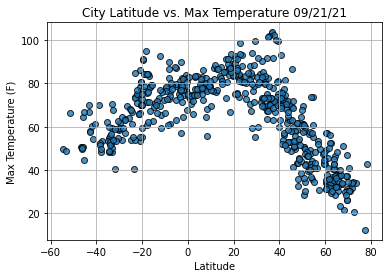

In [14]:
# Import the time module.

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

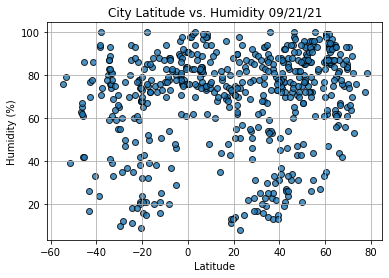

In [15]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

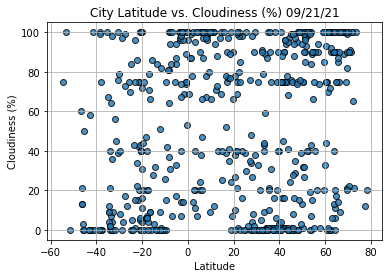

In [16]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

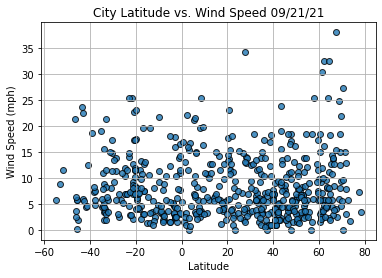

In [17]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()